# 야코비안 Jacobian과 치환적분
<hr/>

야코비안의 의미를 완전히 이해하기 위해 고등학교 치환적분부터 시작해서 다변수 함수에서의 야코비안의 의미까지 정리한다. 약간의 다변수 벡터함수에 대한 지식만 있으면 이해할 수 있도록 자세히 풀어적었다.

## 1. 일변수 함수에서 치환적분과 야코비안
<hr/>

고등학교 치환적분에서 다음과 같은 식이 나온다. $x = g(t)$의 관계가 있을 때 

$$
\int f(x) dx = \int f\left(g(t)\right) \frac{d g(t)}{dt} dt \tag{1.1}
$$

위와 같이 변수를 바꿔서 적분하는 것이 원래 적분과 왜 같은지 일변수 함수의 경우 다음 그림으로 설명할 수 있다.

<table>
<tr><td>
<img src="./change-of-variable.png" alt="change-of-variable.png" width="750">
</td></tr>
<tr><td>
1변수 함수의 치환적분
</td></tr>
</table>

$f(x)$의 원시함수 $F(x)$를 구하고자할 때 그림처럼 $F(x)$를 $x=g(t)$ 관계에 의해 $F(g(t))$로 변수변환하고 이를 미분하면 

$$
\begin{align}
\frac{d F(g(t))}{dt} &= \frac{dF(g(t))}{dg(t)}\frac{dg(t)}{dt} \\[5pt]
&= \frac{dF(x)}{dx}\frac{dx}{dt} \qquad \because x = g(t) \\[5pt]
&= f(x) \frac{dx}{dt} \\[5pt]
&= f(g(t)) \frac{dx}{dt} \\[5pt]
&= f(g(t)) \frac{dg(t)}{dt}
\end{align} \tag{1.2}
$$

가 된다. $F(g(t))$의 미분은 원래 함수 $f(x)$를 $x=g(t)$ 관계에 의해 $f(g(t))$로 변수변환한 것에 $dx/dt$를 곱한 것이기 때문에 이를 적분하여 변수변환 $t = g^{-1}(x)$ 을 해주면 $F(x)$를 구할 수 있게 된다. 위 그림에서 (2)번 경로이다. 변수변환한 함수 $f(g(t))$에 곱해주는 $dx/dt$을 야코비안이라고 한다. 이 야코비안이 어떤 역할을 하기에 $x$에서의 적분과 $t$에서의 적분을 동일하게 하는가? 이를 다음 실습으로 확인한다.


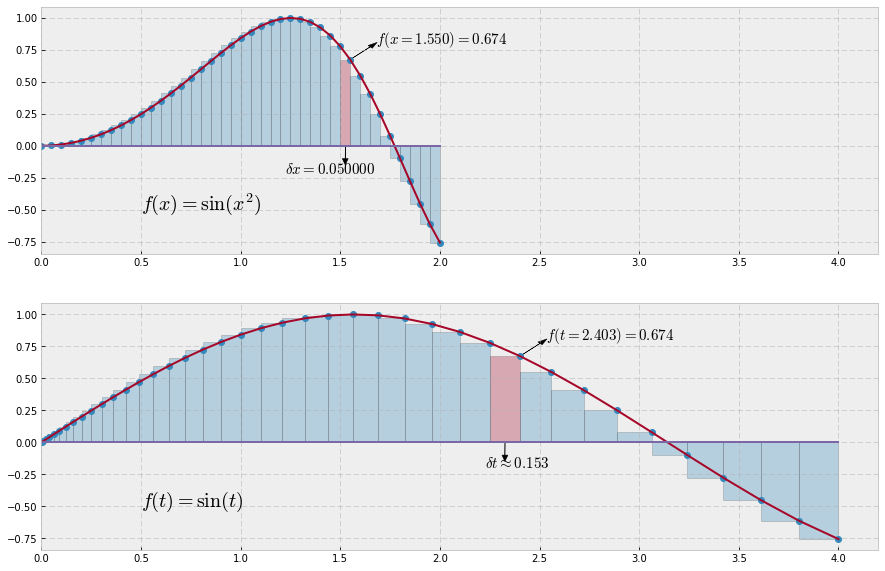

dx = 0.001 for calc.
int f(x)dx  exact = 0.804776, approx. = 0.805
x_32=1.550, f[x_32]=0.674, dx=0.05, f[x_32]*dx=0.034


dt = [  2.50000000e-07   7.50000000e-07   1.25000000e-06]...  for calc. is variable
int f(t)dt  exact = 1.6536  , approx. = 1.652
t_32=2.403, f[t_32]=0.674, dt=0.153, f[t_32]*dx=0.103
J[31]=0.328
int f(t)|J|dt = 0.804


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches

mpl.style.use('bmh')
plt.rcParams["figure.figsize"] = (15,10)

# 그림을 위해 그래프를 40개 구간으로 자르고, 
# 수치오차를 줄여 계산하기위해 4000개로 잘라 따로 계산한다.
Ng = 41 # for graphic step
Nc = 4001 # for calc. step

x0 = 0; x1 = 2
########################################################################################
# domain x
########################################################################################
Xg = np.linspace(x0, x1, Ng) 
Xc  = np.linspace(x0, x1, Nc)
dxg = (x1 - x0) / (Ng-1) 
dxc = (x1 - x0) / (Nc-1)
fxg = np.sin(Xg**2); 
fxc = np.sin(Xc**2);

ax1 =  plt.subplot(211)
ax1.plot(Xg, fxg , 'o', Xg, fxg, Xg, np.zeros(Xg.shape)) # x 도메인에서 그림
#ax1.plot(Xg, np.ones(Xg.shape)*0.674)
ax1.arrow(Xg[31], fxg[31], 0.1, 0.1, head_width=0.03, head_length=0.05, fc='k', ec='k')
ax1.text(Xg[31]+0.13, fxg[31]+0.13, r"$f(x={:.3f})={:.3f}$".format(Xg[31], fxg[31]), fontdict={ 'size': 15, })
ax1.arrow((Xg[30]+Xg[31])/2, 0, 0.0, -0.1, head_width=0.03, head_length=0.05, fc='k', ec='k')
ax1.text((Xg[30]+Xg[31])/2-0.3, 0-0.22, r"$\delta x={:f}$".format(dxg), fontdict={ 'size': 15, })
ax1.text(0.5, -0.5, r"$f(x)=\sin(x^2)$", fontdict={ 'size': 20, })

# 32번째 점(인덱스 31), 31번째 기둥
for i in range(Xg.shape[0]-1):
    if i == 30 :
        facecolor = '#A60628'
    else :
        facecolor = '#348ABD'
    rect = patches.Rectangle( (Xg[i], 0.0), dxg, fxg[i+1], facecolor=facecolor, alpha=0.3, edgecolor='k' )
    ax1.add_patch(rect)

ax1.set_xlim([0, 4.2])


########################################################################################
#x로부터 변환된 t 도메인 스페이스
########################################################################################
Txg = Xg**2;  
Txc = Xc**2;
dtxg = np.diff(Txg); 
dtxc = np.diff(Txc)
ftxg = np.sin(Txg); 
ftxc = np.sin(Txc);

ax2 = plt.subplot(212)
ax2.plot(Txg, ftxg, 'o', Txg, ftxg, Txg, np.zeros(Txg.shape)) # t 도메인에서 그림
ax2.arrow(Txg[31], ftxg[31], 0.1, 0.1, head_width=0.03, head_length=0.05, fc='k', ec='k')
ax2.text(Txg[31]+0.13, ftxg[31]+0.13, r"$f(t={:.3f})={:.3f}$".format(Txg[31], ftxg[31]), fontdict={ 'size': 15, })
ax2.arrow((Txg[30]+Txg[31])/2, 0, 0.0, -0.1, head_width=0.03, head_length=0.05, fc='k', ec='k')
ax2.text((Txg[30]+Txg[31])/2-0.1, 0-0.2, r"$\delta t\approx{:.3f}$".format(dtxg[30]), fontdict={ 'size': 15, })
ax2.text(0.5, -0.5, r"$f(t)=\sin(t)$", fontdict={ 'size': 20, })

for i in range(Txg.shape[0]-1):
    if i == 30 :
        facecolor = '#A60628'
    else :
        facecolor = '#348ABD'
    rect = patches.Rectangle( (Txg[i], 0.0), dtxg[i], ftxg[i+1],  facecolor=facecolor, alpha=0.3, edgecolor='k' )
    ax2.add_patch(rect)
    
ax2.set_xlim([0, 4.2])

plt.show()

# int 0~2 sin(x^2) dx = int 0~4 sin(t) [1 / 2sqrt(t)] dt  
#                                      |
#                                      -> This part is jacobian dx/dt = d sqrt(t)/dt

#print("f(x) = {}".format(fxg))
print("dx = {:.3f} for calc.".format(dxc))
xbars_c = fxc[1:]*dxc
xbars_g = fxg[1:]*dxg
print("int f(x)dx  exact = 0.804776, approx. = {:.3f}".format((xbars_c).sum()))
print("x_32={:.3f}, f[x_32]={:.3f}, dx={}, f[x_32]*dx={:.3f}".format(Xg[31], fxg[31], dxg, xbars_g[30]))
print('\n')

print("dt = {}...  for calc. is variable".format(dtxc[:3]))
txbars_c = ftxc[1:]*dtxc
txbars_g = ftxg[1:]*dtxg
print("int f(t)dt  exact = 1.6536  , approx. = {:.3f}".format( (txbars_c).sum()) )
print("t_32={:.3f}, f[t_32]={:.3f}, dt={:.3f}, f[t_32]*dx={:.3f}".format(Txg[31], ftxg[31], dtxg[30], txbars_g[30]))
Jc = np.abs(1/2 * 1/np.sqrt(Txc[1:]))
Jg = xbars_g / txbars_g
print("J[31]={:.3f}".format(Jg[30]))
print("int f(t)|J|dt = {:.3f}".format((txbars_c*Jc).sum()))



위 그림은

$$ \int_{0}^{2} \sin(x^2) dx \tag{1.3}$$

를 하기 위해 $x = g(t) = \sqrt{t}$ 로 치환하여 적분할 때 상황을 나타내고 있다. quora에 올라온 질문에 대한 답변에 있는 예제로 애니메이션과 함께 야코비안의 의미를 잘 설명하고 있다.<sup>[1]</sup> 먼저 주어진 함수를 그대로 0~2 범위에서 적분한 그림이 위 그림이다. 그림을 그리고 수치적으로 적분하기 위해서 구간을 40구간, 4000구간 등간격으로 잘랐다. 실제 적분값은 0.804776이고 4000구간으로 잘라 막대기둥의 넓이를 다 더한것이 0.805이다. 이 상태에서 $t$로 변수를 바꿔서 적분을 해보자. 

$x = g(t) = \sqrt{t}$로 부터 $t = g^{-1}(x) = x^2$이므로 위쪽 그래프의 $x$을 모두 제곱해서 $t$로 만든다. 그러면 $x$ 도메인에서 일정하던 등간격이 $t$ 도메인에서는 $t$값이 커질 수록 간격이 넓어지게 된다. 선형 관계가 아니라 비선형 즉 제곱의 관계로 변환되어서 그렇다. 이렇게 변환된 $t$는 $x$가 모두 제곱되어 있는 것이므로 이를 $\sin(t)$에 넣어서 함수값을 계산하면 원래 $\sin(x^2)$와 동일한 함수값을 얻게 된다. 두 경우 다 $\sin$함수에 $x$를 제곱해서 집어넣었기 때문이다. 다만 $t$ 도메인에서 계산한 함수값은 찍히는 위치가 달라져서 $t$ 도메인에서 $\sin(t)$함수는 $\sin(x^2)$를 옆으로 잡아늘린 모양이 된다. 구체적인 예를 들어보면 32번째 $x$인 $x_{32}$는 위치가 약 1.550인데 이때의 함수값은 0.674이다. 1.550이 제곱된 $t=$2.403에 대해서도 함수값은 여전히  0.674인 것을 알 수 있다. 이제 두 그래프의 붉은색 기둥을 보면 높이는 같은데 밑변이 달라서 넓이가 서로 다르다. 넓이를 계산해서 나누면 위 그래프의 붉은색 원기둥은 아래 그래프 붉은색 원기둥 넓이의 약 0.328배이다. 각 기둥마다 대응되는 기둥의 넓이비가 모두 존재한다. 따라서 그 비율을 $\sin(t)$의 각 기둥에 곱한 다음 다 더해주면 원래의 적분과 동일하게 된다는 것을 그림으로 부터 알 수 있다. 그냥 다 더하면 1.652라는 값이 되어 원래 적분값보다 많이 커진다.
이때 넓이의 비라는 것은 대응하는 기둥의 높이는 모두 같으므로 결국 밑변의 길이비가 되고 이는 $\delta x/ \delta t$임을 알 수 있다. 이 미소변량의 길이비가 야코비안이다. 다시말해 야코비안은 작은 조각을 모두 더해서 적분할때 어떤 한 조각이 변수변환된 스페이스에서 얼마나 변했는지를 알려주는 양이다. 변수변환의 관계가 선형이라면 기둥의 넓이비는 일괄적으로 2배 또는 3배처럼 상수배가 되지만 비선형일 경우 변환된 변수에 따라 그 값이 달라진다. 위 그래프에서 등간격으로 잘린 $\delta x$가 $t$ 도메인으로 변환되면서 점점 더 넓어지는 현상을 통해 이를 이해할 수 있다. 이 경우 야코비안은 다음과 같다.

$$
J = \frac{1}{2 \sqrt{t}} \tag{1.4}
$$

위 데모 프로그램에서 각 기둥의 야코비안을 기둥의 넓이비로 구하였는데 위 식을 이용해서 붉은색 기둥의 야코비안을 구하기 위해서는 기둥 밑변의 중점을 구해 위 식에 대입하면 된다.

In [2]:
print("{:.3f}".format(1/(2*np.sqrt((Txg[31]+Txg[30])/2))))

0.328


기둥의 넓이비와 동일함을 알 수 있다. 그래서 전체 적분은 다음과 같다.

$$
\int_0^2 \sin(x^2) dx = \int_0^4 \sin(t)  \frac{1}{2 \sqrt{t}}  dt \tag{1.5}
$$


전체적으로 보면 $\sin(t)$에 야코비안이 곱해진 함수를 적분하는 것이된다.

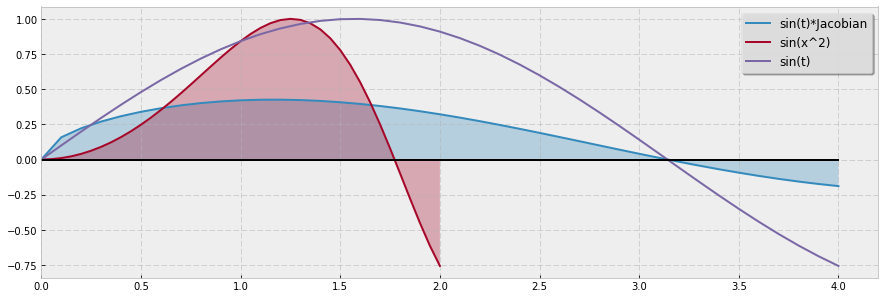

In [3]:
plt.rcParams["figure.figsize"] = (15,5)

########################################################################################
# 새로 등간격으로 생성한 t 도메인 스페이스
########################################################################################
# mapping
# x = g(t)      x = sqrt(t) ,  
# t = g_inv(x), t = x^2, 
t0 = x0**2; t1 = x1**2

Tg = np.linspace(t0, t1, Ng) + np.finfo(np.float32).eps
ftg = np.sin( np.sqrt(Tg)**2 ) 
Jg = np.abs(1/2 * 1/np.sqrt(Tg))
fJ = ftg*Jg
x_axis = np.zeros(Tg.shape)
ax = plt.subplot(111)

ax.plot(Tg, fJ,   label='sin(t)*Jacobian') 
ax.plot(Xg, fxg, label='sin(x^2)')
ax.plot(Tg, ftg, label='sin(t)')  

ax.plot(Tg, x_axis, 'k') # t 도메인에서 그림
ax.fill_between(Tg, x_axis, fJ, interpolate=True, alpha=0.3)
ax.fill_between(Xg, x_axis, fxg, interpolate=True, alpha=0.3)
ax.set_xlim([0, 4.2])

legend = plt.legend(loc='upper right', shadow=True, fontsize=12)
plt.show()

위 그림을 보면 변수변환 후 무엇을 적분하는지 알 수 있다. 
애초에 붉은색 영역의 넓이를 구하는 문제에서 변수를 변환해서 파란색 영역의 넓이를 구했고 이 두 영역의 넓이는 정확히 똑같다.

야코비안의 의미를 이해했고 어떻게 계산하는지도 알았으므로 $x$로 부터 변환된 $t$를 사용하지 않고 아래처럼 $t$ 도메인을 등간격으로 잘라서 각 지점에서 적절한 야코비안을 계산해주기만 하면 적분을 동일하게 수행할 수 있다.

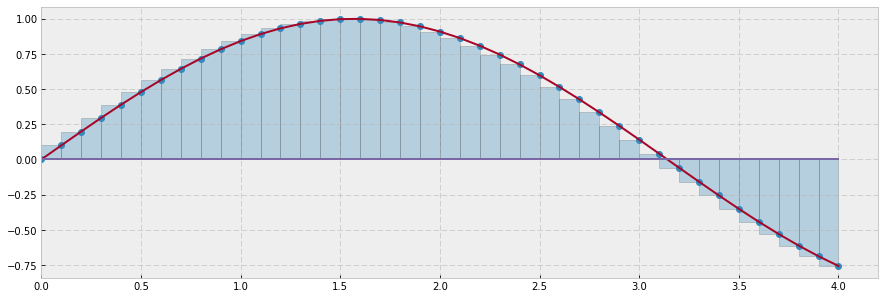

dt = 0.001
int f(t)dt  exact = 1.6536  , approx. = 1.653
int f(t)|J|dt = 0.805




In [4]:
plt.rcParams["figure.figsize"] = (15,5)

########################################################################################
# 새로 등간격으로 생성한 t 도메인 스페이스
########################################################################################
# mapping
# x = g(t)      x = sqrt(t) ,  
# t = g_inv(x), t = x^2, 
t0 = x0**2; t1 = x1**2

Tg = np.linspace(t0, t1, Ng); 
Tc = np.linspace(t0, t1, Nc); 

dtg = (t1 - t0) / (Ng-1); 
dtc = (t1 - t0) / (Nc-1);

ftg = np.sin( np.sqrt(Tg)**2 ); 
ftc = np.sin( np.sqrt(Tc)**2 ); ftxc = np.sin(Txc);  # sin(x=g(t)) t 만 보이는 모양의 함수 t도메인에서 생각.

ax = plt.subplot(111)
ax.plot(Tg, ftg, 'o', Tg, ftg, Tg, np.zeros(Tg.shape)) # t 도메인에서 그림

for i in range(Tg.shape[0]-1):
    rect = patches.Rectangle( (Tg[i], 0.0), dtg, ftg[i+1],  facecolor='#348ABD', alpha=0.3, edgecolor='k' )
    ax.add_patch(rect)

ax.set_xlim([0, 4.2])

plt.show()

print("dt = {}".format(dtc))
tbars_c = ftc[1:]*dtc
print("int f(t)dt  exact = 1.6536  , approx. = {:.3f}".format( (tbars_c).sum()) )
J = np.abs(1/2 * 1/np.sqrt(Tc[1:]))
print("int f(t)|J|dt = {:.3f}".format((tbars_c*J).sum()))
print('\n')

이제 이 결과를 다변수 함수로 확장해본다.

## 2. 다변수 함수에서 치환적분과 야코비안
<hr/>

많은 문서에서 설명하는 방법이 조금씩 달라서 엄청 햇갈리는데 용어 정리부터 한다.

- 야코비안 또는 야코비안 행렬: 한 변수를 다른 변수로 매핑하는 맵(함수)를 독립변수로 미분한 행렬 즉, 다변수 벡터함수를 다변수로 미분한 것으로 행렬형태로 나타나므로 야코비안 행렬 또는 그냥 야코비안 이라고 함 $J$로 표시

- 야코비안 행렬식<sup>Jacobian Determinant</sup> : 위 정의한 야코비안 또는 야코비안 행렬의 행렬식으로 기하학적으로 야코비안 행렬의 각 칼럼 벡터로 이루어진 도형의 넓이를 의미함. 문헌에 따라 이것을 야코비안이라고 지칭하기도 함. 이 행렬식의 값을 $J$로 표시하기도 함.

- $\mid J \mid$ : 야코비안 행렬식의 절대값, 정확하게는 $\mid \text{det}(J) \mid$로 써야하나 위 정의처럼 야코비안 행렬식을 그냥 야코비안으로 부르고 $J$라고 쓰는 경우는 야코비안 행렬식의 절대값을 의미하는 표시로 사용할 수 있음.

야코비안의 용어에 대한 공식적인 내용은 아래 위키피디아에 나와 있다.<sup>[2]</sup>

>In vector calculus, the Jacobian matrix (/dʒɪˈkoʊbiən/, /jɪˈkoʊbiən/) is the matrix of all first-order partial derivatives of a vector-valued function. When the matrix is a square matrix, both the matrix and its determinant are referred to as the Jacobian in literature.

이제 적분할 함수와 변수변환의 관계를 아래와 같이 정의하고 실습을 통해 이해 해본다.

$$
f(x_1, x_2) = f(\mathbf{x}) = f(x_1^2 + x_2^2) \tag{2.1}
$$

$$
x_1 = g_1(u_1, u_2) = u_1 \cos(u_2) \\[4pt]
x_2 = g_2(u_1, u_2) = u_1 \sin(u_2) \tag{2.2}
$$

위 예는 전형적인 직교좌표계와 극좌표계의 변환식인데 각 좌표계의 변수를 하나의 벡터변수로 쓰기위해 $x$, $u$로 표시했다. 정의에 의해 변수변환의 관계를 나타내는 함수 $\mathbf{g}(\mathbf{u})$는 다변수 벡터함수<sup>multi valued vector function</sup>가 된다. 즉 다음과 같다.

$$
\mathbf{x}= \mathbf{g}(\mathbf{u})=
\begin{cases}
g_1(\mathbf{u}) = u_1 \cos(u_2) \\[5pt]
g_2(\mathbf{u}) = u_1 \sin(u_2)
\end{cases} \tag{2.3}
$$

일변수함수에서 알게된 치환적분의 공식 "변수를 바꾸고 변수변환의 관계식을 변환 후의 변수로 미분한 항을 곱하는 방식"대로라면 일단 다변수 함수의 경우 치환적분은 다음과 같이 되어야 할 것같다.

$$
\int \int_{D} f(x_1, x_2) dx_1 dx_2 = \int \int_{D^{*}} f(g_1(u_1, u_2), g_2(u_1, u_2)) \frac{\partial \mathbf{g}(\mathbf{u})}{\partial \mathbf{u}} du_1 du_2 \tag{2.4}
$$

여기서 $ \dfrac{\partial \mathbf{g}(\mathbf{u})}{\partial \mathbf{u}}$은 벡터함수를 벡터변수로 미분하는 꼴이되어 결과는 행렬이 된다. 그래서 위 식은 성립하지 않는다. 일변수함수에서 사용했던 논리는 넓이를 구하기 위한 밑변의 길이비의 변화를 알아내는 것이었다. 이를 기하학적으로 2변수함수에 그대로 적용하면 부피를 구하기 위한 밑면의 넓이비가 된다. 일변수 함수의 경우 기하학적인 내용을 고려하지 않고 대수적으로 치환식을 유도할 수 있었지만 다변수함수에서는 기하학적 해석을 통해 미소면적<sup>infinitesimal area</sup>넓이비를 다시 구해야 한다. 이를 위해 우선 그림부터 그려서 상황을 알아보자.

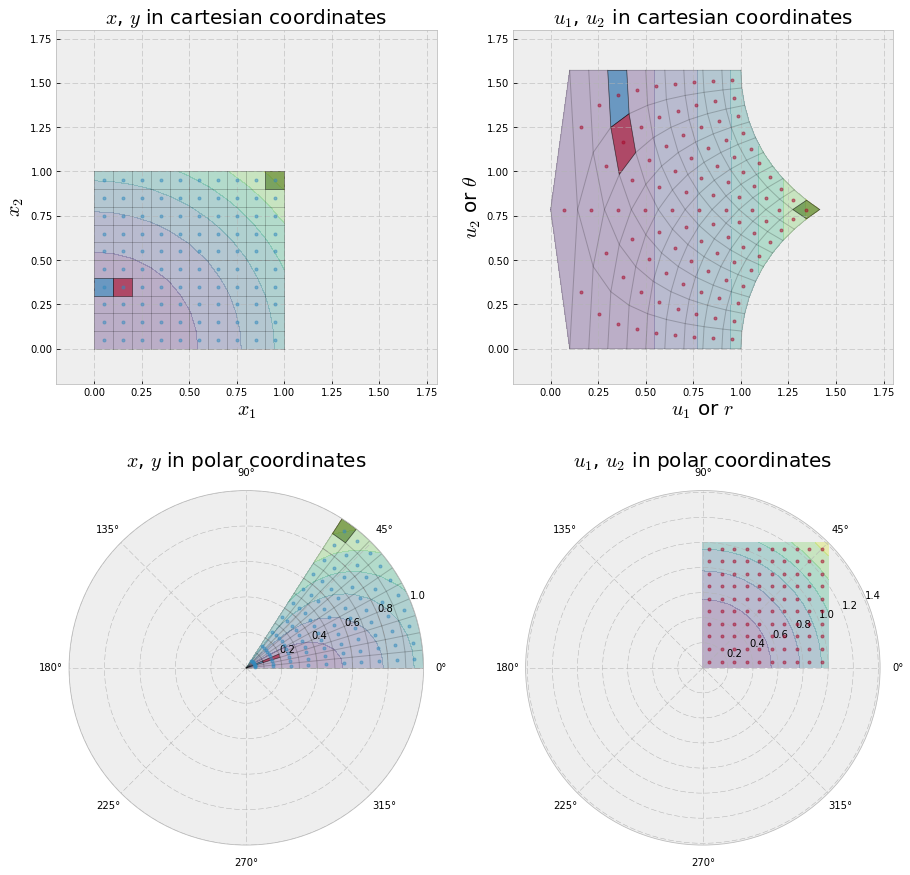

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

mpl.style.use('bmh')
#style = plt.style.library['bmh']
#print(style['axes.prop_cycle'])

plt.rcParams["figure.figsize"] = (15, 15)

# 적분하고자하는 영역
x1 = np.linspace(0, 1, 11) + np.finfo(np.float32).eps
x2 = np.linspace(0, 1, 11) + np.finfo(np.float32).eps

# 적분영역을 작은 사각형으로 만들었을 때 영역의 중앙
x1c = (x1[1:]+x1[:-1])/2
x2c = (x2[1:]+x2[:-1])/2

# 작은 사각형으로 분할했을때 한 변의 길이
dx = np.diff(x1)
dy = np.diff(x2)

# x-도메인의 메쉬데이터
xx1, xx2 = np.meshgrid(x1, x2)
xx1c, xx2c = np.meshgrid(x1c, x2c)

# x-도메인에서의 함수값
fx = (xx1**2 + xx2**2)

plt.subplots_adjust(hspace=0.3)

########################################################################################
# domain x
########################################################################################
ax1 = plt.subplot(221)
# 그리드와 컨투어로 영역의 바탕을 그린다.
ax1.plot(xx1, xx2, xx1.T, xx2.T, color='k',lw=1, alpha=0.2 )
ax1.contourf(xx1, xx2, fx, alpha=0.3)

# 특정 3개 영역을 색칠한다.
rect1 = patches.Rectangle( (xx1[3, 0], xx2[3, 0]), dx[0], dy[0],  facecolor='#348ABD', alpha=0.6, edgecolor='k' )
ax1.add_patch(rect1)
rect2 = patches.Rectangle( (xx1[3, 1], xx2[3, 1]), dx[0], dy[0],  facecolor='#A60628', alpha=0.6, edgecolor='k' )
ax1.add_patch(rect2)
rect3 = patches.Rectangle( (xx1[9, 9], xx2[9, 9]), dx[0], dy[0],  facecolor='#467821', alpha=0.6, edgecolor='k' )
ax1.add_patch(rect3)

#영역의 중점을 그린다.
ax1.plot(xx1c, xx2c, '.', color='#348ABD', alpha=0.5)

# 좌표축 세팅 및 부가 정보 
ax1.set_xlim(-0.2,1.8)
ax1.set_ylim(-0.2,1.8)
ax1.set_xlabel(r'$x_{1}$', fontdict={ 'size': 20, })
ax1.set_ylabel(r'$x_{2}$', fontdict={ 'size': 20, })
ax1.set_title(r'$x$, $y$ in cartesian coordinates', fontdict={ 'size': 20, })

########################################################################################
# domain u
########################################################################################
ax2 = plt.subplot(222)

# x도메인의 좌표값을 아래 관계에 의해 u도메인으로 변경한다.
# x1 = g1(u1, u2) = u1 cos(u2)
# x2 = g2(u1, u2) = u1 sin(u2)
# 위 관계는 사실 극좌표와 직교좌표간의 관계이다.
# 변수 이름은 하나의 벡터로 기술하기 위해 u1, u2로 한다.
# 영역 정보
uu1 = np.sqrt(xx1**2 + xx2**2) #원점까지의 거리 r
uu2 = np.arccos(xx1/uu1)       #theta

# 영여의 중점
uu1c = np.sqrt(xx1c**2 + xx2c**2) #원점까지의 거리 r
uu2c = np.arccos(xx1c/uu1c)       #theta

# u-도메인에서 함수값을 다시 계산
fu = (uu1*np.cos(uu2))**2 +  (uu1*np.sin(uu2))**2

# 그리드와 컨투어로 영역의 바탕을 그린다.
ax2.plot(uu1, uu2, uu1.T, uu2.T, color='k',lw=1, alpha=0.2 )
ax2.contourf(uu1, uu2, fu, alpha=0.3)

# 특정 3개 영역을 색칠한다.
i,j = 3,0
verts_30 = [
    (uu1[i,j], uu2[i,j]), # 좌하
    (uu1[i,j+1], uu2[i,j+1]), # 우하 
    (uu1[i+1,j+1], uu2[i+1,j+1]), # 우상
    (uu1[i+1,j], uu2[i+1,j]), # 좌상 
    (uu1[i,j], uu2[i,j]), # 좌하
]
codes = [ Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY, ]
path = Path(verts_30, codes)
patch = patches.PathPatch(path, facecolor='#348ABD', alpha=0.6, edgecolor='k' )
ax2.add_patch(patch)

i,j = 3,1
verts_31 = [
    (uu1[i,j], uu2[i,j]), (uu1[i,j+1], uu2[i,j+1]), (uu1[i+1,j+1], uu2[i+1,j+1]), 
    (uu1[i+1,j], uu2[i+1,j]), (uu1[i,j], uu2[i,j]), 
    ]
path = Path(verts_31, codes)
patch = patches.PathPatch(path, facecolor='#A60628', alpha=0.6, edgecolor='k')
ax2.add_patch(patch)

i,j = 9,9
verts_99 = [
    (uu1[i,j], uu2[i,j]), (uu1[i,j+1], uu2[i,j+1]), (uu1[i+1,j+1], uu2[i+1,j+1]), 
    (uu1[i+1,j], uu2[i+1,j]), (uu1[i,j], uu2[i,j]), 
    ]
path = Path(verts_99, codes)
patch = patches.PathPatch(path, facecolor='#467821', alpha=0.6, edgecolor='k')
ax2.add_patch(patch)

#영역의 중점을 그린다.
ax2.plot(uu1c, uu2c, '.', color='#A60628', alpha=0.5)

# 좌표축 세팅 및 부가 정보 
ax2.set_xlim(-0.2,1.8)
ax2.set_ylim(-0.2,1.8)
ax2.set_xlabel(r'$u_1$ or $r$', fontdict={ 'size': 20, })
ax2.set_ylabel(r'$u_2$ or $\theta$', fontdict={ 'size': 20, })
ax2.set_title(r'$u_1$, $u_2$ in cartesian coordinates', fontdict={ 'size': 20, })

########################################################################################
# x in polar
########################################################################################
ax3 = plt.subplot(223, projection='polar')

ax3.plot(xx2, xx1, xx1, xx2, color='k',lw=1, alpha=0.2 )
ax3.contourf(xx2, xx1, fx, alpha=0.3)

rect1 = patches.Rectangle( (xx2[3, 0], xx1[3, 0]), dx[0], dy[0], alpha=0.6, facecolor='#348ABD', edgecolor='k' )
ax3.add_patch(rect1)
rect2 = patches.Rectangle( (xx2[3, 1], xx1[3, 1]), dx[0], dy[0], alpha=0.6, facecolor='#A60628', edgecolor='k' )
ax3.add_patch(rect2)
rect3 = patches.Rectangle( (xx2[9, 9], xx1[9, 9]), dx[0], dy[0], alpha=0.6, facecolor='#467821', edgecolor='k' )
ax3.add_patch(rect3)

ax3.plot(xx2c, xx1c, '.', color='#348ABD', alpha=0.5)
ax3.set_title(r'$x$, $y$ in polar coordinates', fontdict={ 'size': 20, })


########################################################################################
# u in polar
########################################################################################
# 진짜 극좌표계에서 적분되는 상태
ax4 = plt.subplot(224, projection='polar')

ax4.contourf(uu2, uu1, fu.T, alpha=0.3)
ax4.plot(uu2c, uu1c, '.', color='#A60628', alpha=0.5)

ax4.set_title(r'$u_1$, $u_2$ in polar coordinates', fontdict={ 'size': 20, })

plt.show()


위 그림에서 색깔띠는 함수값을 색깔로 나타낸것이고 그리드 영역은 적분의 영역을 나타내고, 점은 그 영역의 중간점을 나타낸다. 그리고 3개의 영역의 색깔을 다르게 나타내었다. 각 그래프는 다음과 같은 상황에서 그려진 것이다.

- 좌상단 : $f(\mathbf{x})$를 $x_1x_2$평면에 그대로 그린것으로 적분의 영역은 $[0,1] \times [0,1]$

- 우상단 : 적분 영역 $[0,1] \times [0,1]$을 작은 정사각형으로 분할한 후 그 영역의 격자점의 $u_1$, $u_2$값(쉽게 생각해서 각점의 $r$, $\theta$값)을 계산하여 직교좌표 $u_1u_2$평면에 그린것

- 좌하단 : $x_1x_2$평면의 값을 변환없이 그대로 극좌표계에다 그린것, $x_1$은 $r$로 $x_2$는 $\theta$로 매핑함.

- 우하단 : 변환된 $u_1$, $u_2$값을 극좌표계에다 그린것 실제 변수변환하여 적분하는 상황을 나타낸 그림

이제 적분을 하는 상황을 생각해보자. 기본적으로 좌상단의 경우 100개의 작은 정사각형 영역에서 점으로 나타낸 중간값에서의 $f(\mathbf{x})$값을 구하여 해당 정사격형의 넓이에 곱하여 다 더하면 된다. 이 값을 $V_1$이라 하자. 그리고 우선은 복잡하니까 극좌표계는 생각하지 말고 변환 $\mathbf{g}(\mathbf{u})$를 그냥 일반적인 변수변환 함수라 생각하자. $\mathbf{g}(\mathbf{u})$에 의해 적절해 변환된 $\mathbf{u}$를 $u_1u_2$평면에 그리게 되면 이 정사각형 영역이 우상단 그림처럼 왜곡된다. 이 때 격자점에서의 함수값 $f(\mathbf{u})$는 일변수때와 같이 변하지 않으므로 왜곡된 폴리곤의 넓이에 격자점에서의 함수값을 곱해서 다 다한 $V_2$는 $V_1$과 당연히 같지 않다. 이 값을 서로 같게 해주는 것이 목적인데 일변수때의 논리를 그대로 적용하면 각각 대응되는 몉면의 넓이차를 보정해주면 된다. 그렇게 보정해주는 역할을 하는 것이 야코비안이다. 여기까지 논리는 일변수때와 똑같다. 그림에서 보면 녹색 정사각형은 왜곡이 적고 파란색과 붉은색 정사격형은 왜곡이 심해지는 것을 알 수 있다. 일변수때도 아래 밑변의 길이의 변화가 오른쪽으로 갈 수록 커지는 것을 확인한바 있다. 이와 똑같은 상황이다. 이제 이 두 밑면의 넓이에 어떤 관계가 있는지 밝히기 전에 수치적으로 두 적분이 동일한지 실험해보자.

In [6]:
def poly_area(x,y):
    """
    https://en.wikipedia.org/wiki/Shoelace_formula
    https://stackoverflow.com/questions/24467972/calculate-area-of-polygon-given-x-y-coordinates
    """
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))


# 적분의 정해 2/3
fxc = xx1c**2 + xx2c**2
fuc = (uu1c*np.cos(uu2c))**2 +  (uu1c*np.sin(uu2c))**2

Vfxc = fxc * dx*dy

A = []
for i in range(10):
    for j in range(10):
        A.append(poly_area((uu1[i,j], uu1[i,j+1], uu1[i+1,j+1], uu1[i+1,j]), 
                           (uu2[i,j], uu2[i,j+1], uu2[i+1,j+1], uu2[i+1,j])))

# 왜곡된 폴리곤의 넓이 1행부터 그림상 제일 아래쪽 사각형 행이 저장되어있음
# 즉 그림상 좌하단에서 우상단 방향으로 행렬에 저장됨
# 파란 사각형이 왜곡된 넓이는 4행0열, 붉은 사각형은 4행1열에 있음
Au = np.array(A).reshape(10,10)
J = dx*dy / Au
Vfuc = fuc * J * Au

#x1, x2에서 0~1까지 적분구간은
print("좌상단 그림의 격자의 넓이와 중점에서의 함수값 f(x1, x2)를 곱해서 다 더한 값 = {:.4f}".format(Vfxc.sum()))

#u1, u2에서는 u1:0 ~ pi/2, u2:0 ~ sqrt(2) 로 변환
print("우상단 그림의 폴리곤의 넓이와 좌상단 그림 격자와의 넓이비를 중점에서의 함수값 f(u1, u2)과 곱해서 다 더한 값 = {:.4f}".format(Vfuc.sum()))
print('\n')

print("파란 찌그러진 사각형:{:f}, 정사각형과의 넓이비 Ax/Au:{:f}".format(Au[3,0], J[3,0]))
print("붉은 찌그러진 사각형:{:f}, 정사각형과의 넓이비 Ax/Au:{:f}".format(Au[3,1], J[3,1]))
print("녹색 찌그러진 사각형:{:f}, 정사각형과의 넓이비 Ax/Au:{:f}".format(Au[9,9], J[9,9]))

좌상단 그림의 격자의 넓이와 중점에서의 함수값 f(x1, x2)를 곱해서 다 더한 값 = 0.6650
우상단 그림의 폴리곤의 넓이와 좌상단 그림 격자와의 넓이비를 중점에서의 함수값 f(u1, u2)과 곱해서 다 더한 값 = 0.6650


파란 찌그러진 사각형:0.028329, 정사각형과의 넓이비 Ax/Au:0.352993
붉은 찌그러진 사각형:0.026138, 정사각형과의 넓이비 Ax/Au:0.382591
녹색 찌그러진 사각형:0.007436, 정사각형과의 넓이비 Ax/Au:1.344743


당연한 이야기지만 밑면의 넓이비를 보정하고 이를 함수값과 곱한 부피를 다 더하면 결과는 같다. 각 사각형의 넓이비는 다음과 같다. 수치적으로 구한 이 넓이비가 수치적으로 구한 야코비안과 같은지 나중에 확인해 볼 것이다.


In [7]:
np.set_printoptions(threshold=1000, linewidth =150)
print(J)

[[ 0.09003177  0.16097839  0.2548802   0.35299284  0.45214982  0.55168127  0.65138375  0.75117778  0.85102642  0.9509103 ]
 [ 0.16097839  0.21976879  0.295651    0.38259061  0.4750754   0.57032338  0.66707654  0.76472456  0.86294393  0.96154926]
 [ 0.2548802   0.295651    0.35821835  0.43346232  0.51688783  0.60542531  0.69717147  0.79099794  0.88622728  0.98243897]
 [ 0.35299284  0.38259061  0.43346232  0.49832396  0.57278004  0.6539      0.73964373  0.82862426  0.91991178  1.01288014]
 [ 0.45214982  0.4750754   0.51688783  0.57278004  0.63900662  0.71285855  0.79234837  0.87601995  0.9628178   1.05198086]
 [ 0.55168127  0.57032338  0.60542531  0.6539      0.71285855  0.77995567  0.85335653  0.93164151  1.01372265  1.09877246]
 [ 0.65138375  0.66707654  0.69717147  0.73964373  0.79234837  0.85335653  0.92104923  0.99410659  1.07146934  1.1522961 ]
 [ 0.75117778  0.76472456  0.79099794  0.82862426  0.87601995  0.93164151  0.99410659  1.06222983  1.13501889  1.21165522]
 [ 0.85102642  0

위의 넓이비를 적절히 만들어내는 야코비안 행렬을 유도하기전에 행렬의 행렬식이 가지는 기하학적인 의미에 대해 알아본다.<sup>[3]</sup> 2차원 벡터 $\mathbf{u}$, $\mathbf{v}$를 열로 가지는 행렬 $\mathbf{M}$이 있을 때

$$
\mathbf{M} = \begin{bmatrix} \mathbf{u} & \mathbf{v} \end{bmatrix} =  \begin{bmatrix}
a & c \\
b & d
\end{bmatrix} \tag{2.5}
$$

각 열을 두 변으로 하는 평행사변형을 생각 해볼 수 있다.

<table>
<tr><td>
<img src="./det.png" width="450">
</td></tr>
<tr><td>
행렬식의 기하학적 의미
</td></tr>
</table>

위 그림처럼 구성된 평행사변형의 넓이의 반은 사각형 o, a, (a,d), d의 넓이에서 초록, 노랑, 파랑 삼각형의 넓이를 뺀 것이다. 따라서 평행사변형 넓이의 반은 다음과 같다.

$$
ad - \frac{1}{2}cd - \frac{1}{2}ab - \frac{1}{2}(a-c)(d-b) \\
= ad - \frac{1}{2}cd - \frac{1}{2}ab - \frac{1}{2}(ad - ab- cd + cb) \\
= ad - \frac{1}{2}cd - \frac{1}{2}ab - \frac{1}{2}ad + \frac{1}{2}ab + \frac{1}{2}cd - \frac{1}{2}cb \\
= \frac{1}{2} ad - \frac{1}{2}cb \\
= \frac{1}{2}(ad - bc) \tag{2.6}
$$

위 결과를 2배하면 평행사변형의 넓이가 되고 이는 행렬 $\mathbf{M}$의 행렬식과 일치한다. 이 결과는 평행사변형을 이루는 두 벡터를 열이 아니라 행으로 가지는 행렬에 대해서도 성립한다. 그리고 열의 배치 순서에 따라 행렬식에 -1을 곱해야 넓이값과 일치하는 경우도 생길 수 있다. 만약 행렬 $\mathbf{M}$을 

$$
\mathbf{M} = \begin{bmatrix} \mathbf{v} & \mathbf{u} \end{bmatrix} =  \begin{bmatrix}
c & a \\
d & b
\end{bmatrix} \tag{2.7}
$$

로 두면 이 행렬의 행렬식은 $bc - ad$가 되고 평행사변형의 넓이는 $ad-bc>0$이므로 $ | bc - ad | = ad-bc$가 되어 평행사변형의 넓이를 표현할때는 꼭 절대값 기호를 써주게 된다.

이제 변수변환에 있어서 미소면적이 어떻게 변하는지 알아본다.

중요한것은 주어진 문제가 정의된 좌표계가 변환 후 좌표계이고 변수를 변환해서 얻게 되는 좌표계가 정규좌표계라는 것이다. 변환 전과 변환 후에 대한 넓이 변화의 관계를 알아보기 위해 $u_{1}u_{2}$ 평면에서의 미소 정사각형이 $x_{1}x_{2}$ 평면에서 어떻게 변화하는지 알아보게 된다는 것이다. 우리는 문제를 $x_{1}x_{2}$ 좌표계에서 $u_{1}u_{2}$ 좌표계로 변환시키지만 그 변환에 따른 넓이 변화의 관계를 파악하기 위해서는 거꾸로 $u_{1}u_{2}$ 좌표계에서 $x_{1}x_{2}$ 좌표계로의 변환을 생각하게 된다. 그렇게 하지 않고 $x_{1}x_{2}$ 좌표계의 미소 정사각형이 $u_{1}u_{2}$ 좌표계에서 어떻게 변하는지를 고려하게 되면 결과적으로 야코비안 행렬의 역행렬을 구하게 된다. 어차피 넓이의 비를 알아보려는 것이어서 어느쪽으로 해도 상관은 없지만 여기서는 원래 야코비안을 유도하기 위해 전자의 경우를 고려한다.

<table>
<tr><td>
<img src="./jacobian.png" alt="jacobian.png" width="750">
</td></tr>
<tr><td>
일차변환에 의한 사각형의 상
</td></tr>
</table>

이제 위 그림을 보고 하나씩 설명한다. 위 그림을 보면 왼쪽이 $u_{1}u_{2}$ 좌표계이고 미소 정사각형이 있는 것을 볼 수 있다. 이 정사각형을 문헌에 따라서 마스터 엘리먼트<sup>master element</sup> $\hat{\Omega}$이라 하기도 한다.<sup>[4]</sup> 주어진 사상 $x_{1} = g_{1}(u_{1},u_{2})$, $x_{2} = g_{2}(u_{1},u_{2})$에 의해 변환된 좌표계에서 마스터 엘리먼트가 찌그러진 마름모꼴로 변환되는데 이를 $\Omega_{e}$로 두자. 각 꼭지점의 색깔을 보면 어떻게 변환되어 가는지 알 수 있다. 이미 말했듯이 문제를 변환시킬 때는 오른쪽에서 왼쪽으로 변환시키고, 지금은 변환에서의 넓이비를 알아보려는 것이니 왼쪽에서 오른쪽으로 변환을 생각한다.

 $u_{1}u_{2}$ 좌표계에서 초록색 꼭지점의 좌표를 $(\hat{u}_{1}, \hat{u}_{2})$라 두면 노란색 꼭지점의 좌표는 $(\hat{u}_{1}+\delta u_{1}, \hat{u}_{2})$, 파란색 꼭지점의 좌표는 $(\hat{u}_{1}, \hat{u}_{2}+\delta u_{2})$임을 알 수 있다. 이 점들이 사상 $\mathbf{g}(\mathbf{u})$에 의해 변환된 좌표는 순서대로 $(g_{1}(\hat{u}_{1}, \hat{u}_{2}), g_{2}(\hat{u}_{1}, \hat{u}_{2}))$, $(g_{1}(\hat{u}_{1}+\delta u_{1}, \hat{u}_{2}), g_{2}(\hat{u}_{1}+\delta u_{1}, \hat{u}_{2}))$, $(g_{1}(\hat{u}_{1}, \hat{u}_{2}+\delta u_{2}), g_{2}(\hat{u}_{1}, \hat{u}_{2}+\delta u_{2}))$이 될것이다. 초록색 꼭지점을 기준점으로 하기 위해  $(\hat{x}_{1}=g_{1}(\hat{u}_{1}, \hat{u}_{2}), \hat{x}_{2}=g_{2}(\hat{u}_{1}, \hat{u}_{2}))$라 두면 노란색 점의 좌표는 $\delta u_{1}$에 의해 함수 $g_{1}$과 $g_{2}$가 변화한 양만큼을 초록색 꼭지점의 좌표에 더해주면 되므로
 
$$
\text{yellow point} = \left( \hat{x}_{1}+\frac{\partial g_{1}}{\partial u_1} \delta u_{1} +\frac{\partial g_{1}}{\partial u_2} \delta u_{2}  , \hat{x}_{2}+\frac{\partial g_{2}}{\partial u_1} \delta u_{1} +\frac{\partial g_{2}}{\partial u_2} \delta u_{2} \right) \tag{2.8}
$$

와 같이 쓸 수 있는데 $\delta u_{2}=0$ 이므로 결과적으로 

$$
\text{yellow point} = \left( \hat{x}_{1}+\frac{\partial g_{1}}{\partial u_1} \delta u_{1} \,,\, \hat{x}_{2}+\frac{\partial g_{2}}{\partial u_1} \delta u_{1} \right) \tag{2.9}
$$

가 된다. 같은 논리로 

$$
\text{blue point} = \left( \hat{x}_{1}+\frac{\partial g_{1}}{\partial u_2} \delta u_{2} \,,\, \hat{x}_{2}+\frac{\partial g_{2}}{\partial u_2} \delta u_{2} \right) \tag{2.10}
$$

이 된다. $\Omega_{e}$의 넓이를 구하기 위해 초록점에서 노란점으로의 벡터를 $\mathbf{v}_{y}$, 초록점에서 파란점으로의 벡터를 $\mathbf{v}_{b}$라 두면

$$
\mathbf{v}_{y} = \left( \hat{x}_{1}+\frac{\partial g_{1}}{\partial u_1} \delta u_{1} \,,\, \hat{x}_{2}+\frac{\partial g_{2}}{\partial u_1} \delta u_{1} \right) - (\hat{x}_{1}, \hat{x}_{2}) = \left( \frac{\partial g_{1}}{\partial u_1} \delta u_{1} \,,\, \frac{\partial g_{2}}{\partial u_1} \delta u_{1} \right) \\[5pt]
\mathbf{v}_{b} = \left( \hat{x}_{1}+\frac{\partial g_{1}}{\partial u_2} \delta u_{2} \,,\, \hat{x}_{2}+\frac{\partial g_{2}}{\partial u_2} \delta u_{2} \right) - (\hat{x}_{1}, \hat{x}_{2}) = \left( \frac{\partial g_{1}}{\partial u_2} \delta u_{2} \,,\, \frac{\partial g_{2}}{\partial u_2} \delta u_{2} \right) \tag{2.11}
$$

이 된다. 이 두 벡터를 열로 하는 행렬의 행렬식이 $\Omega_{e}$의 넓이가 되므로 행렬은

$$
\begin{bmatrix}
\dfrac{\partial g_{1}}{\partial u_1} \delta u_{1} &  \dfrac{\partial g_{1}}{\partial u_2} \delta u_{2} \\
\dfrac{\partial g_{2}}{\partial u_1} \delta u_{1} &  \dfrac{\partial g_{2}}{\partial u_2} \delta u_{2}
\end{bmatrix} \tag{2.12}
$$

이 된다. $\Omega_{e}$의 넓이를 $S(\Omega_{e})$로 표기하기로 하고 행렬식을 구해 보면

$$
\begin{align}
S(\Omega_{e})=\text{det}\left(\,
\begin{bmatrix}
\dfrac{\partial g_{1}}{\partial u_1} \delta u_{1} &  \dfrac{\partial g_{1}}{\partial u_2} \delta u_{2} \\
\dfrac{\partial g_{2}}{\partial u_1} \delta u_{1} &  \dfrac{\partial g_{2}}{\partial u_2} \delta u_{2}
\end{bmatrix}\,
\right)&=\frac{\partial g_{1}}{\partial u_1} \delta u_{1} \frac{\partial g_{2}}{\partial u_2} \delta u_{2}-
\frac{\partial g_{1}}{\partial u_2} \delta u_{2} \frac{\partial g_{2}}{\partial u_1} \delta u_{1} \\[5pt]
&=\left(\frac{\partial g_{1}}{\partial u_1} \frac{\partial g_{2}}{\partial u_2} - \frac{\partial g_{2}}{\partial u_1}\frac{\partial g_{1}}{\partial u_2}\right) \delta u_{1}\delta u_{2} \\[5pt]
&=\text{det}\underbrace{\left(\,
\begin{bmatrix}
\dfrac{\partial g_{1}}{\partial u_1} &  \dfrac{\partial g_{1}}{\partial u_2} \\
\dfrac{\partial g_{2}}{\partial u_1} &  \dfrac{\partial g_{2}}{\partial u_2}
\end{bmatrix}\,
\right)}_{\text{Jacobian Matrix, J}}  \delta u_{1}\delta u_{2}
\end{align} \tag{2.13}
$$

가 된다. 정리하면 

$$
S(\Omega_{e})= \mid \text{det}(J) \mid \delta u_{1}\delta u_{2} \tag{2.14}
$$

이고, 이 때 $J$는 야코비안 행렬로 다음과 같으며 이는 변환 사상 $\mathbf{g}$를 $\mathbf{u}$로 미분한 행렬이 된다.

$$
J = \begin{bmatrix}
\dfrac{\partial g_{1}}{\partial u_1} &  \dfrac{\partial g_{1}}{\partial u_2} \\
\dfrac{\partial g_{2}}{\partial u_1} &  \dfrac{\partial g_{2}}{\partial u_2}
\end{bmatrix} =  \frac{\partial \mathbf{g}(\mathbf{u})}{\partial \mathbf{u}}  \tag{2.15}
$$

위 식(2.14)의 의미는 $u_{1}u_{2}$ 평면에서 정사각형 넓이 $\delta u_{1}\delta u_{2}$는 $x_{1}x_{2}$ 평면에서 $S(\Omega_{e})$로 왜곡되는데 그때 두 도형의 넓이 비는 $ \mid \text{det}(J) \mid $라는 것이다. 한가지 주의해야할 점은 넓이의 비를 구하는 것이기 때문에 앞서 살펴본대로 $\text{det}(J)$에 절대값을 씌웠다. 

한가지 더 생각해야 할 것은 변환의 비선형성이다. 변환에 따라 정사각형이 평행사변형꼴로 왜곡되지 않는것이 일반적이나(변환이 선형변환일 때만 평행사변형으로 변환) 정사각형의 크기를 매우 작게해서 어떤점 근방에서 변환의 선형근사를 생각한다면 평행사변형으로 왜곡된다고 볼 수 있다. 이에 대한 매우 좋은 예가 칸아카데미 야코비안 강의에 나온다. 변환을 $x+\sin(y)$, $y+sin(x)$로 하여 전체적으로는 물결모양으로 변환이 되나 국소적으로는 평행사변형으로 선형 근사되는것을 동영상으로 확인할 수 있다.<sup>[5]</sup> 

이야기를 계속하기 위해 식(2.14)를 다시 쓰면 

$$
S(\Omega_{e})= \mid \text{det}(J) \mid S(\hat{\Omega}) \tag{2.16}
$$

로 쓸 수 있는데 여기서 명백하게 $S(\Omega_{e}) \ne S(\hat{\Omega})$이다. 이렇게 서로 다른 영역의 넓이를 $\mid \text{det}(J) \mid$가 같게 해준다는 의미인데 여기서 좌변, 즉 $S(\Omega_{e})$를 미소면적 분할에 대한 리만합으로 표현하면

$$
S(\Omega_{e}) = \int \int_{\Omega_{e}} dx_1 dx_2 \tag{2.17}
$$

로 쓸 수 있다. 우변 역시 미소면적 분할에 대한 리만합으로 써보면


$$
\mid \text{det}(J) \mid  S(\hat{\Omega}) = \int \int_{\hat{\Omega}} \mid \text{det}(J) \mid  du_1 du_2 \tag{2.18}
$$

따라서 $u_{1}u_{2}$ 평면에서 임의의 영역 $\hat{\Omega}$와 이 영역이 변환된 $x_{1}x_{2}$ 평면에서 영역 $\Omega_{e}$에 대해 각각의 면적 간에 다음과 같이 등식이 성립함을 알 수 있다.

$$
\int \int_{\Omega_{e}}  dx_1 dx_2 = \int \int_{\hat{\Omega}} \left| \text{det} \left( \frac{\partial \mathbf{g}(\mathbf{u})}{\partial \mathbf{u}} \right) \right| du_1 du_2 \tag{2.19}
$$

이제 식(2.19)으로 부터 두 영역 위에서 정의된 다변수 함수의 적분 관계를 얻을 수 있다.

$$
\int \int_{\Omega_{e}} f(x_1, x_2) dx_1 dx_2 = \int \int_{\hat{\Omega}} f(g_1(u_1, u_2), g_2(u_1, u_2)) \left| \text{det} \left( \frac{\partial \mathbf{g}(\mathbf{u})}{\partial \mathbf{u}} \right) \right| du_1 du_2 \tag{2.20}
$$

즉, 식(2.19)에 의해 면적이 동일하게 되는 두 적분식의 양변에 동일한 함수값을 곱해서 적분하니 결과는 당연히 같을 수 밖에 없는 것이다. 각 영역에서의 함수값 $f(x_1, x_2)$와 $f(g_1(u_1, u_2), g_2(u_1, u_2))$는 같다는 것을 앞서 수치적으로 확인한바 있다. 이 식을 다른 표현으로 다음과 같이 쓸 수 도 있다.

$$
\int \int_{\Omega_{e}} f(x_1, x_2) dx_1 dx_2 = \int \int_{\hat{\Omega}} f(g_1(u_1, u_2), g_2(u_1, u_2)) \mid J \mid du_1 du_2 \tag{2.21}
$$

$$
\int\int_{\Omega_{e}} f(x_1, x_2) dx_1 dx_2 = \int \int_{\hat{\Omega}} f(g_1(u_1, u_2), g_2(u_1, u_2)) \left| \text{det} \left( \frac{\partial(g_1, g_2)}{\partial(u_1, u_2)} \right) \right| du_1 du_2 \tag{2.22}
$$

식(2.21)같은 경우는 $J$를 이미 야코비안 행렬식으로 표기한 경우이다. 이 식이 바로 야코비안 행렬식이 등장하는 다변수함수에서의 치환적분 식이다.

그럼 예제로 든 변환에 대해서 야코비안 행렬식의 값을 구해보자. 여기서는 $J$를 야코비안 행렬로 표기하기로 한다. $\mathbf{g}(\mathbf{u})$의 정의대로 야코비안 행렬을 구해보면 다음과 같다.

$$
J = \begin{bmatrix}
\dfrac{\partial u_{1} \cos (u_{2})}{\partial u_{1}} & \dfrac{\partial u_{1} \cos (u_{2})}{\partial u_{2}} \\
\dfrac{\partial u_{1} \sin (u_{2})}{\partial u_{1}} & \dfrac{\partial u_{1} \sin (u_{2})}{\partial u_{2}} 
\end{bmatrix}=\begin{bmatrix}
\cos(u_{2}) & -u_{1}sin(u_{2}) \\
\sin(u_{2}) & u_{1}\cos(u_{2})
\end{bmatrix} \tag{2.22}
$$

이에 대해 행렬식을 구하면 

$$
\text{det}(J) = \text{det}\left( \begin{bmatrix}
\cos(u_{2}) & -u_{1}\sin(u_{2}) \\
\sin(u_{2}) & u_{1}\cos(u_{2})
\end{bmatrix} \right) = u_{1}\cos^{2}(u_{2}) + u_{1}\sin^{2}(u_{2}) = u_{1}(\cos^{2}(u_{2}) +\sin^{2}(u_{2}))  = u_{1} \tag{2.23}
$$

결과적으로 $u_1$이 된다. 이 말은 위 그래프에서 좌상단 그래프의 정사각형이 우상단 그래프의 폴리곤으로 왜곡될때 대응되는 각 도형의 넓이비가 $u_1$이라는 말이 된다. 정말 그런가 수치적으로 구해진 넓이비와 $u_1$의 값을 비교해보자.

In [8]:
print('수치적으로 구한 두 도형의 넓이비')
print(J)
print('\n')
print('왜곡된 도형의 중점에서 u_1 값')
print(uu1c)


수치적으로 구한 두 도형의 넓이비
[[ 0.09003177  0.16097839  0.2548802   0.35299284  0.45214982  0.55168127  0.65138375  0.75117778  0.85102642  0.9509103 ]
 [ 0.16097839  0.21976879  0.295651    0.38259061  0.4750754   0.57032338  0.66707654  0.76472456  0.86294393  0.96154926]
 [ 0.2548802   0.295651    0.35821835  0.43346232  0.51688783  0.60542531  0.69717147  0.79099794  0.88622728  0.98243897]
 [ 0.35299284  0.38259061  0.43346232  0.49832396  0.57278004  0.6539      0.73964373  0.82862426  0.91991178  1.01288014]
 [ 0.45214982  0.4750754   0.51688783  0.57278004  0.63900662  0.71285855  0.79234837  0.87601995  0.9628178   1.05198086]
 [ 0.55168127  0.57032338  0.60542531  0.6539      0.71285855  0.77995567  0.85335653  0.93164151  1.01372265  1.09877246]
 [ 0.65138375  0.66707654  0.69717147  0.73964373  0.79234837  0.85335653  0.92104923  0.99410659  1.07146934  1.1522961 ]
 [ 0.75117778  0.76472456  0.79099794  0.82862426  0.87601995  0.93164151  0.99410659  1.06222983  1.13501889  1.2116552

결과를 비교해보면 (1행 1열), (1행 2열)과 (2행 1열)의 값 3개를 제외하고는 값이 거의 비슷한 것을 확인할 수 있다. 차이가 많이나는 것은 위 그림에서 도형이 많이 왜곡되어 평행사변형에서 많이 벗어났기 때문이며 이는 도형을 더 작게 자르면 줄어들게 된다. 어쨌거나 실제 넓이비가 야코비안 행렬식 $u_1$값과 일치함을 수치적인 실험으로도 확인할 수 있었다.

지금까지 2변수 함수에서의 야코비안을 이야기했다. 2변수 이상에서도 차원이 하나 증가할 뿐 논리는 이와 동일하다. 본 글에서는 치환적분을 위한 변환 변수를 일반화를 위해 $u_1$, $u_2$로 두었지만 사실 예시로 든 변환은 변수 변환에서 특별히 중요한 극좌표계로의 변환이므로 변수를 $r$, $\theta$로 쓰는 편이 더 자연스럽기는하다. 그렇게 두면 야코비안 행렬식의 값은 $r$이 된다. 이제 좌표계 변환에서의 야코비안 행렬식과 극좌표계에서의 적분의 관계에 대해 생각해 본다.

위 4개의 그래프에서 좌하단의 그림은 $x_1$, $x_2$값을 그대로 극좌표계에 그린것을 나타낸다. 즉, 직교좌표계의 반듯한 공간이 극좌표계에서는 부채꼴로 바뀌는것을 보여준다. 이는 극좌표계에서 적분을 위한 미소면적이 부채꼴 모양이라는 이야기이다. 직교좌표계에서의 미소면적은 어느 위치에서나 동일한 정사각형 모양이나 극좌표계에서는 $\theta$와 $r$을 등간격으로 무한히 잘게 잘랐을 때 $r$이 커질수록 미소면적도 커진다는것을 직관적으로 알 수 있다. 미소면적이 위치에 따라 달라지기 때문에 결과적으로 미소면적은 $r \, dr \, d\theta$ 형태로 나타나게 되는데 이는 $r$이 긴 큰 부채꼴의 넓이에서 $r$이 좀 짧은 작은 부채꼴의 넓이를 빼는 것으로 구할 수 있으며 기초 미적분학 교재에 잘 나와 있다.<sup>[6]</sup> 결과적으로 이는 위에서 유도한 야코비안 행렬식을 변환된 변수의 미소변량에 곱한것과 같은 형태가 된다. 

그림에서 예로 든 $[0,1] \times [0,1]$ 영역 위에서 주어진 함수를 적분할때 이를 극좌표계로 변환하여 적분한다는것의 의미는 우하단 그림과 같이 동일한 정사각 영역을 극좌표에 그려놓고 이 영역 위에서 부채꼴로 분할된 미소면적에 함수값을 곱해서 다 더하는 것이 된다. 이는 적분 영역 자체가 왜곡된 우상단 그림과 같은 영역을 직교좌표계에 올려놓고 왜곡된 영역의 면적을 보정해서 함수값을 곱해서 다 더하는 것과 결과적으로 같다. 
야코비안 행렬식과 부채꼴의 미소면적에 나타나는 $r$이 동일하다는 것은 적분 영역의 왜곡정도와 부채꼴로 분할된 미소면적이 변화하는 정도가 동일하다는 것을 의미한다.

## 3. 참고 문헌

1. What is the Jacobian howdoes it work and what is an intuitive explanation of the Jacobian and a change of basis, https://www.quora.com/What-is-the-Jacobian-how-does-it-work-and-what-is-an-intuitive-explanation-of-the-Jacobian-and-a-change-of-basis#

2. Jacobian matrix and determinant, https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant

3. 행렬식의 기하학적 의미 , https://wikidocs.net/4049

4. Finite Elements vol.1 An Introduction, Eric B. Becker, Graham F. Carey, J. Tinsley Oden, Prentice-Hall

5. The Jacobian matrix, Khan Academy, https://youtu.be/bohL918kXQk?t=1m15s

6. Thomas' Calculus 미분적분학, Giordano, Weir, Finney 미분적분학 교재편찬위원회, Pearson (주)북스힐 


    

In [2]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/nanummyeongjo.css' rel='stylesheet' type='text/css'>
<link href='http://fonts.googleapis.com/earlyaccess/nanumgothiccoding.css' rel='stylesheet' type='text/css'>
<link href='http://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<style>
    p  { font-family: 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li { font-family: 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    li > p { text-indent: 0px; }
    code, pre { font-family: 'Nanum Gothic Coding' !important; }
    
    .code-body { font-family: 'Nanum Gothic Coding'; }
    .ns { font-family: 'Noto Sans KR'; font-size: 15pt;}
</style>